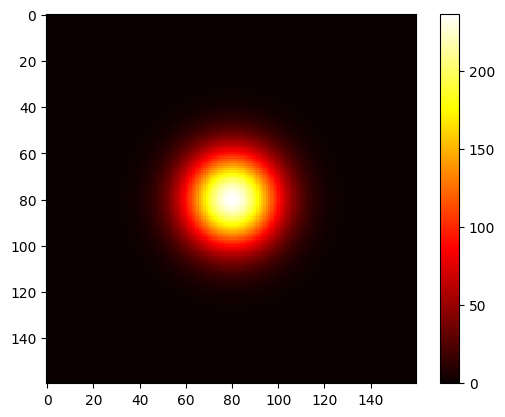

In [115]:
import importlib
import psf
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, ifftshift,fft2
import math

importlib.reload(psf)

dx = 0.065
raw_image_size_x = 128
raw_image_size_y = 128
padding_size = 16
light_wavelength = 0.660
numerical_aperture = 1.3
sigma = math.sqrt(2.0)/(2.0*math.pi)*light_wavelength/numerical_aperture 

grid_physical_1D_x = dx*np.arange(-(raw_image_size_x/2 + padding_size),(raw_image_size_x/2 + padding_size)) # in micrometers
grid_physical_1D_y = dx*np.arange(-(raw_image_size_y/2 + padding_size),(raw_image_size_y/2 + padding_size)) # in micrometers
psf_on_grid = np.zeros((raw_image_size_x+2*padding_size, raw_image_size_y+2*padding_size))

for j in range(raw_image_size_y+ 2*padding_size):
    for i in range(raw_image_size_x + 2*padding_size):
        x_e = [grid_physical_1D_x[i], grid_physical_1D_y[j]]
        x_e = np.array(x_e)
        psf_on_grid[i, j] =  math.exp(-np.linalg.norm([0,0]-x_e)**2/(2.0*sigma**2)) /(math.sqrt(2.0*math.pi) * sigma)**(np.shape(x_e)[0])

plt.imshow(np.abs(fftshift(fft2(fftshift(psf_on_grid)))), cmap='hot', interpolation='nearest')
modulation_transfer_function = abs(fftshift(fft2(fftshift(psf_on_grid))))[padding_size:-padding_size, padding_size:-padding_size]
modulation_transfer_function_vectorized = (modulation_transfer_function.flatten()) / sum(sum(modulation_transfer_function))
plt.colorbar()
#plt.colorbar()

In [1]:
for i in range(12):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [116]:
import cv2

im = cv2.imread('code.png')
height, width, channels = im.shape
new_im = np.ones((height, width, 4)) * 255
new_im[:, :, :3] = im
for i in range(height):
    for j in range(width):
        if new_im[i, j, :3].tolist() == [255.0, 255.0, 255.0]:
            new_im[i, j, :] = np.array([255.0, 255.0, 255.0, 0])
cv2.imwrite('tmp_transparent.png', new_im)


True

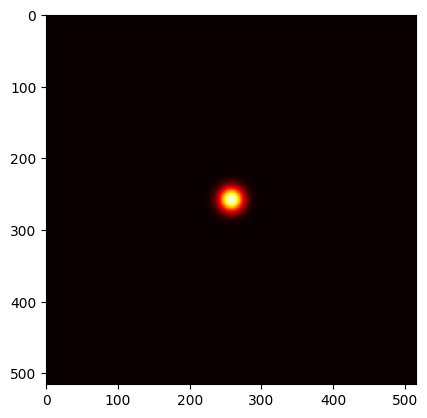

In [110]:
d = 258
x = np.arange(-d, d)
y = np.arange(-d, d)
s = np.zeros((2*d, 2*d))

for j in range(2*d):
    for i in range(2*d):
        coordinate = [x[i], y[j]]
        coordinate = np.array(coordinate)
        s[i, j] = math.exp(-(np.linalg.norm(coordinate))**2/100)
    
plt.imshow(fftshift(np.abs(fft2(fftshift(s)))), cmap='hot', interpolation='nearest')

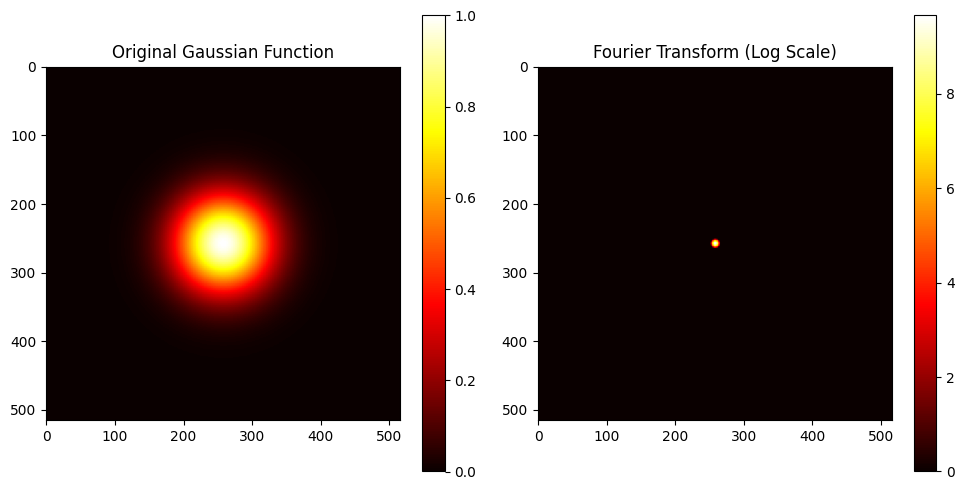

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

# 定义高斯函数的参数
d = 258
sigma = 50  # 高斯函数的标准差
x = np.arange(-d, d)
y = np.arange(-d, d)

# 创建二维网格
X, Y = np.meshgrid(x, y)

# 定义二维高斯函数
s = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# 计算傅里叶变换
S = fftshift(fft2(s))

# 可视化傅里叶变换的结果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(s, cmap='hot', interpolation='nearest')
plt.title("Original Gaussian Function")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(S)), cmap='hot', interpolation='nearest')  # 使用对数尺度
plt.title("Fourier Transform (Log Scale)")
plt.colorbar()

plt.tight_layout()
plt.show()

In [42]:
a = np.array([1,2])
b = np.array([2,3])
print(np.linalg.norm(a-b))


1.4142135623730951


In [118]:
from numpy import random

rng = random.default_rng()
print(rng.random((5,5)))


[[0.30717157 0.1133224  0.14501412 0.31042332 0.30344015]
 [0.10383541 0.2569896  0.56074154 0.8328592  0.06401271]
 [0.93258541 0.19114249 0.01570578 0.92442951 0.99675904]
 [0.42705357 0.49073185 0.02839312 0.97900999 0.35734566]
 [0.79517475 0.77657513 0.54609412 0.59252599 0.14054799]]


In [152]:
import numpy as np
import time
a = []
for i in range(10):
    b = []
    for j in range(10):
        b.append(j+10*i)
    a.append(b)
a = np.array(a)
a1 = np.arange(3,6)
b1 = np.arange(3,6)
print(a[np.ix_(a1,b1)])

[[33 34 35]
 [43 44 45]
 [53 54 55]]


In [154]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a+1)


[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [157]:
from scipy.stats import dirichlet, poisson, norm

poisson.logpmf(k = np.array([[1, 2], [3, 4]]), mu = 2)

array([[-1.30685282, -1.30685282],
       [-1.71231793, -2.40546511]])

In [162]:
a = [[1,2,3],[4,5,6]]
a = np.array(a)
np.shape(a)

(2, 3)

In [164]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])